# Waypoint Generation Script
### By Wenqu Fang @ KAIST CIS lab
### v1.0, January 25th, 2024
- This script generates waypoints in terms of `.csv` files between designated nodes on CIS smart city platform
- The waypoints will be subsequently used in global path planning of RC cars on a testbed
- Nodes are created using certain measurements from a map of the testbed

### v1.1, January 30th, 2024
- Right-turn specific paths are implemented. To be tested on testbed.

In [204]:
import csv
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
import scipy.linalg

# Four main reference points

ptA = np.array([-187.1, 212.2])
ptB = np.array([187.2, 212.2])
ptC = np.array([187.2, -212.2])
ptD = np.array([-187.1, -212.2])
ptE = np.array([148.5, -73.1])
ptF = np.array([95.5, -140.3])
ptG = np.array([146.6, 70.1])
ptH = np.array([83.4, 137.9])
ptI = np.array([25.1, 159.7])

# Important parameters

r1 = 33.3 # center to road side
r2 = 43.9 # center to inner lane's center
r3 = 57/2
rE = r3
r4 = 42.05 # radius of circle F
rF = r4
rG = 58.8/2
rH = 59.4/2
rI = 57.2/2
rJ = rI
width_block = (177.6 + 179.3)/2
height_block = 194.2
height_block_bottom = 190.3
width_lane = 21.15


In [205]:

# initialize the nodes
nodes = np.zeros((100, 2))

nodes[1] = ptA + np.array([0, r2])
# print(nodes[1])

nodes[2] = ptA + np.array([width_block - 2*r1, r2])
# print(nodes[2])

nodes[5] = ptA + np.array([-r2, 0])
nodes[6] = nodes[2] + np.array([r2, -r2])
nodes[7] = nodes[6] + np.array([width_lane, 0])
nodes[4] = ptB + np.array([0, r2])
nodes[9] = ptB + np.array([r2, 0])
nodes[3] = ptB + np.array([-(width_block - 2*r1), r2])
nodes[8] = nodes[3] + np.array([-r2, -r2])
nodes[10] = np.array([0,0]) # TBD
nodes[11] = np.array([nodes[6][0], 97]) # 97 is measured on map
nodes[12] = nodes[11] + np.array([width_lane, 0])
nodes[13] = np.array((-nodes[11][0], nodes[11][1]))
nodes[14] = nodes[5] + np.array([0, -(height_block-2*r1)])
nodes[33] = nodes[14] + np.array([r2, -r2])
nodes[17] = ptB + np.array([0, -(height_block - 2*r1) - r2])
nodes[18] = nodes[17] + np.array([r2, r2])
nodes[15] = np.array([91, nodes[33][1]]) # 91 is measured on map
nodes[16] = np.array([0,0]) # TBD
nodes[19] = nodes[15] + np.array([0, -width_lane])
nodes[21] = nodes[19] + np.array([0, -width_lane])
nodes[20] = nodes[17] + np.array([0, -width_lane])
nodes[22] = nodes[20] + np.array([0, -width_lane])
nodes[23] = ptD + np.array([0, height_block_bottom-2*r1+r2+2*width_lane])
nodes[25] = nodes[23] + np.array([0, -width_lane])
nodes[27] = nodes[25] + np.array([0, -width_lane])
nodes[28] = np.array([-88.2, nodes[27][1]]) # -88.2 is measured on map
nodes[26] = nodes[28] + np.array([0, width_lane])
# nodes[24] = -nodes[21]
nodes[24] = nodes[26] + np.array([0, width_lane])
nodes[34] = nodes[27] + np.array([-r2, -r2])
nodes[31] = ptC + np.array([0, height_block_bottom - 2*r1 + r2])
nodes[32] = nodes[31] + np.array([r2, -r2])
nodes[29] = np.array([nodes[15][0], nodes[31][1]])
# print(nodes[15][0])
# print(nodes[31][1])
nodes[30] = np.array([0,0]) # TBD
nodes[35] = ptD + np.array([-r2, 0])
nodes[40] = ptD + np.array([0, -r2])
nodes[41] = nodes[40] + np.array([width_block - 2*r1, 0])
nodes[39] = ptC + np.array([r2, 0])
nodes[43] = ptC + np.array([0, -r2])
nodes[42] = nodes[43] + np.array([-(width_block - 2*r1) + width_lane, 0])
nodes[38] = nodes[42] + np.array([-r2, r2])
nodes[37] = nodes[38] + np.array([-width_lane, 0])
nodes[36] = nodes[37] + np.array([-width_lane, 0])
nodes[44] = np.array([nodes[24][0], nodes[33][1]])
nodes[45] = np.array([nodes[37][0]+width_lane, ptF[1]]) 
# nodes[46] = np.array([64.65, -112.3]) # from measurement
nodes[46] = ptF + 1/2*np.array([-57.3, 61.6]) # diameter vector from measurement
nodes[30] = ptE + np.array([0, r3])
nodes[47] = ptE + 1/2*np.array([-40.3, 40.3]) # diameter vector from measurement

nodes[16] = ptG + np.array([0, -rG])
nodes[48] = ptG + np.array([-42.5, -40.7])/2 # diameter vector from measurement
nodes[49] = ptH + np.array([-43.4, -40.5])/2 # diameter vector from measurement
nodes[50] = ptH + np.array([-rH, 0])
nodes[51] = ptI + np.array([rI, 0])
nodes[52] = ptI + np.array([36, 44.1])/2 # diameter vector from measurement

############################
# ptJ is dependent on nodes[52]!!!!!
ptJ = 2*nodes[52] - ptI
############################

nodes[10] = 2*nodes[52] - nodes[51] # P52 is the midpoint of P51 and P10
nodes[8][0]
print(ptF[0]-nodes[38][0])
print(nodes[31][1] - ptE[1], "?", r3)
print(nodes[50][0] - width_lane, "?", nodes[13][0])
print("51:", nodes[51][0], "50:", nodes[50][0])
print("53:", nodes[10][0], "8:", nodes[8][0])

42.9
28.50000000000003 ? 28.5
32.550000000000004 ? 31.35
51: 53.7 50: 53.7
53: 32.5 8: 31.449999999999996


In [206]:
import pandas as pd
import json

# Assuming you have a DataFrame named df with columns 'X' and 'Y'
data = {'X': [1, 2, 3], 'Y': [4, 5, 6]}
df = pd.DataFrame(data)

# Convert DataFrame to JSON in the desired format
json_data = df.to_dict(orient='list')

# Write JSON data to a file
with open('output.json', 'w') as json_file:
    json.dump(json_data, json_file)


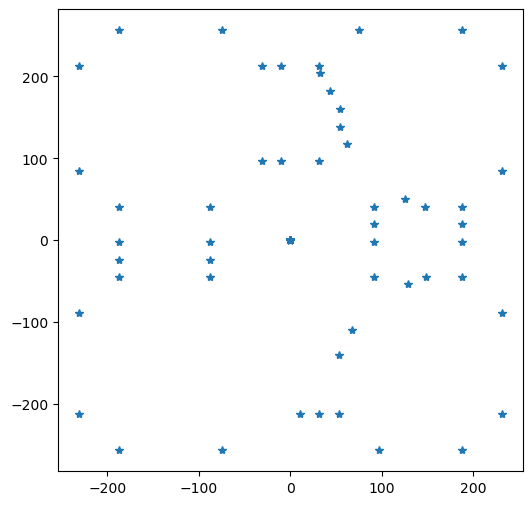

In [207]:
DF = pd.DataFrame(nodes)
DF.columns = ['X', 'Y']
# print(DF)
DF.to_csv('nodes.csv', index=False, index_label=False)
# DF.squeeze().to_json(path_or_buf="nodes.json", orient='list')
# DF2 = pd.DataFrame(nodes.T)

# DF2.index = ["X", "Y"]
# print(DF2)
# DF2.to_json("nodes.json", orient='split')
df_dict = DF.to_dict(orient='list')
# print(df_dict)
with open('output.json', 'w') as json_file:
    json.dump(df_dict, json_file)
plt.plot(nodes[:, 0], nodes[:, 1], '*')
plt.rcParams['figure.figsize'] = [6, 6]

In [208]:
def get_straight_seg(start, end, sampling_dist=10):
    if type(start) != np.ndarray or type(end) != np.ndarray:
        raise TypeError("start and end must be (x,y) coordinates")
    elif np.shape(start) != (2,) or np.shape(end) != (2,):
        raise ValueError("start and end must be 1*2 array")
    elif not isinstance(sampling_dist, (int, float)):
        raise TypeError("sampling_dist must be numerical")
    elif sampling_dist <= 0:
        raise ValueError("sampling_dist must be positive")
    # elif abs(start[0] - end[0]) > width_lane/2 and abs(start[1] - end[1]) > width_lane/2:
    #     raise ValueError("start and end must be on the same straight lane segment")
    dist = np.linalg.norm(end-start)
    sampling_num = int(dist / sampling_dist)
    return np.linspace(start, end, sampling_num)

def get_ellipse_perimeter(major_axis, minor_axis):
    """
    calculate perimeter length of ellipse by Ramanujan's 1st approximation.
    
    **Full ellipse length**
    """
    if major_axis < 0 or minor_axis < 0:
        raise ValueError("arguments cannot be negative")
    return np.pi * (3*(major_axis + minor_axis) - np.sqrt((3*major_axis + minor_axis)*(major_axis+3*minor_axis)))

def get_ellipse_seg(start, end, orientation, sampling_dist=10):
    """
    Input: start and end (np.ndarray); orientation: str (clockwise, anticlockwise), sampling distance
    
    Return elliptical trajectory, in np.ndarray.
    """
    if type(start) != np.ndarray or type(end) != np.ndarray:
        raise TypeError("start and end must be (x,y) coordinates")
    elif np.shape(start) != (2,) or np.shape(end) != (2,):
        raise ValueError("start and end must be 1*2 array")
    elif orientation not in ['clockwise', 'anticlockwise']:
        raise ValueError("orientation must be in ['clockwise', 'anticlockwise']")
    elif not isinstance(sampling_dist, (int, float)):
        raise TypeError("sampling_dist must be numerical")
    elif sampling_dist <= 0:
        raise ValueError("sampling distance must be positive")
    if orientation == 'anticlockwise':
        # divide quadrants
        # first quadrant
        if start[0] > end[0] and start[1] < end[1]:
            print("curve in the first quadrant")
            # base_angle = 0

            a = abs(start[0] - end[0])
            b = abs(end[1] - start[1])
            arclength = get_ellipse_perimeter(a, b) / 4
            sample_number = int(arclength / sampling_dist)
            t = np.linspace(0, np.pi/2, sample_number)
            trajectory = np.zeros((sample_number, 2)) # 2 values (x, y) in one pair of coordinates
            trajectory[:, 0] = a*np.cos(t) + end[0]
            trajectory[:, 1] = b*np.sin(t) + start[1]
            # print(trajectory)
            return trajectory
        
        # second quadrant
        elif start[0] > end[0] and start[1] > end[1]:
            print("curve in the second quadrant")
            a = abs(start[0] - end[0])
            b = abs(end[1] - start[1])
            arclength = get_ellipse_perimeter(a, b) / 4
            sample_number = int(arclength / sampling_dist)
            t = np.linspace(np.pi/2, np.pi, sample_number)
            trajectory = np.zeros((sample_number, 2))
            trajectory[:, 0] = a*np.cos(t) + start[0]
            trajectory[:, 1] = b*np.sin(t) + end[1]
            # print(trajectory)
            return trajectory
        
        # third quadrant
        elif start[0] < end[0] and start[1] > end[1]:
            print("curve in the third quadrant")
            a = abs(start[0] - end[0])
            b = abs(end[1] - start[1])
            arclength = get_ellipse_perimeter(a, b) / 4
            sample_number = int(arclength / sampling_dist)
            t = np.linspace(np.pi, np.pi*3/2, sample_number)
            trajectory = np.zeros((sample_number, 2))
            trajectory[:, 0] = a*np.cos(t) + end[0]
            trajectory[:, 1] = b*np.sin(t) + start[1]
            # print(trajectory)
            return trajectory
        
        # fourth quadrant
        elif start[0] < end[0] and start[1] < end[1]:
            a = abs(start[0] - end[0])
            b = abs(end[1] - start[1])
            arclength = get_ellipse_perimeter(a, b) / 4
            sample_number = int(arclength / sampling_dist)
            t = np.linspace(np.pi*3/2, np.pi*2, sample_number)
            trajectory = np.zeros((sample_number, 2))
            trajectory[:, 0] = a*np.cos(t) + start[0]
            trajectory[:, 1] = b*np.sin(t) + end[1]
            # print(trajectory)
            return trajectory
        
        else:
            raise ValueError("no valid graph is drawn")
    
    elif orientation == 'clockwise':
        # first quadrant
        if start[0] < end[0] and start[1] > end[1]:
            print("curve in the first quadrant")
            # base_angle = 0

            a = abs(start[0] - end[0])
            b = abs(end[1] - start[1])
            arclength = get_ellipse_perimeter(a, b) / 4
            sample_number = int(arclength / sampling_dist)
            t = np.linspace(np.pi/2, 0, sample_number)
            trajectory = np.zeros((sample_number, 2)) # 2 values (x, y) in one pair of coordinates
            trajectory[:, 0] = a*np.cos(t) + start[0]
            trajectory[:, 1] = b*np.sin(t) + end[1]
            # print(trajectory)
            return trajectory
        
        # second quadrant
        elif start[0] < end[0] and start[1] < end[1]:
            print("curve in the second quadrant")
            a = abs(start[0] - end[0])
            b = abs(end[1] - start[1])
            arclength = get_ellipse_perimeter(a, b) / 4
            sample_number = int(arclength / sampling_dist)
            t = np.linspace(np.pi, np.pi/2, sample_number)
            trajectory = np.zeros((sample_number, 2))
            trajectory[:, 0] = a*np.cos(t) + end[0]
            trajectory[:, 1] = b*np.sin(t) + start[1]
            # print(trajectory)
            return trajectory
        # third quadrant
        if start[0] > end[0] and start[1] < end[1]:
            print("curve in the third quadrant")
            # base_angle = 0

            a = abs(start[0] - end[0])
            b = abs(end[1] - start[1])
            arclength = get_ellipse_perimeter(a, b) / 4
            sample_number = int(arclength / sampling_dist)
            t = np.linspace(np.pi*3/2, np.pi, sample_number)
            trajectory = np.zeros((sample_number, 2)) # 2 values (x, y) in one pair of coordinates
            trajectory[:, 0] = a*np.cos(t) + start[0]
            trajectory[:, 1] = b*np.sin(t) + end[1]
            # print(trajectory)
            return trajectory
        
        # fourth quadrant
        elif start[0] > end[0] and start[1] > end[1]:
            print("curve in the fourth quadrant")
            a = abs(start[0] - end[0])
            b = abs(end[1] - start[1])
            arclength = get_ellipse_perimeter(a, b) / 4
            sample_number = int(arclength / sampling_dist)
            t = np.linspace(np.pi*2, np.pi*3/2, sample_number)
            trajectory = np.zeros((sample_number, 2))
            trajectory[:, 0] = a*np.cos(t) + end[0]
            trajectory[:, 1] = b*np.sin(t) + start[1]
            # print(trajectory)
            return trajectory
        
        else:
            raise ValueError("no valid graph is drawn")
    else:
        raise ValueError('program should not reach here!')

[[1.         5.        ]
 [0.92307692 4.92307692]
 [0.84615385 4.84615385]
 [0.76923077 4.76923077]
 [0.69230769 4.69230769]
 [0.61538462 4.61538462]
 [0.53846154 4.53846154]
 [0.46153846 4.46153846]
 [0.38461538 4.38461538]
 [0.30769231 4.30769231]
 [0.23076923 4.23076923]
 [0.15384615 4.15384615]
 [0.07692308 4.07692308]
 [0.         4.        ]]
TypeError caught!
ValueError caught!


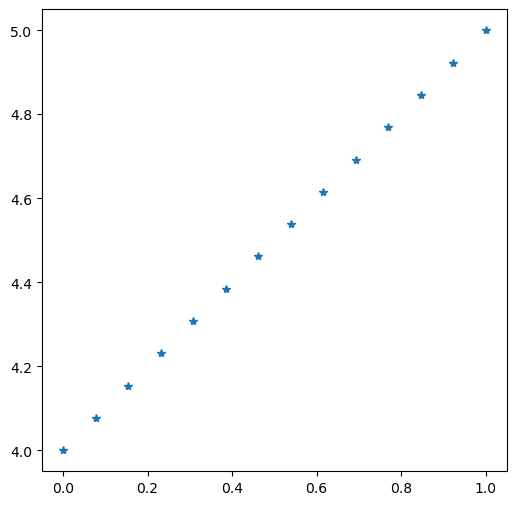

In [209]:
# test functions
sampling_dist = 0.1 # set the sampling distance
# test get_straight_seg
test1 = np.array([1, 5])
test2 = np.array([0, 4])
line1 = get_straight_seg(test1, test2, sampling_dist=sampling_dist)
print(line1)
plt.plot(line1[:, 0], line1[:, 1], '*')
try:
    get_straight_seg(5, test2, sampling_dist)
except TypeError:
    print("TypeError caught!")
try:
    get_straight_seg(test1, test2, -1)
except ValueError:
    print("ValueError caught!")

17.155005932418995
error caught
(2,)
curve in the first quadrant
trajectory array shape: (47, 2)
curve in the second quadrant
curve in the third quadrant


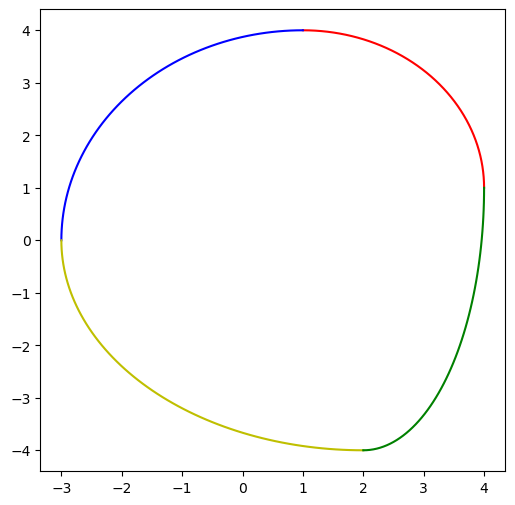

In [210]:
# test get_ellipse_perimeter
print(get_ellipse_perimeter(1, 4))
try:
    get_ellipse_perimeter(-1, 4)
except ValueError:
    print("error caught")
    pass
# test get_ellipse_seg
testA = np.array([4,1])
print(np.shape(testA))
testB = np.array([1,4])
trajectory1 = (get_ellipse_seg(testA, testB, 'anticlockwise', sampling_dist=sampling_dist))
plt.plot(trajectory1[:, 0], trajectory1[:, 1], 'r')
print("trajectory array shape:", np.shape(trajectory1))

testC = np.array([-3, 0])
trajectory2 = get_ellipse_seg(testB, testC, 'anticlockwise', sampling_dist=sampling_dist)
plt.plot(trajectory2[:, 0], trajectory2[:, 1], 'b')

testD = np.array([2, -4])
trajectory3 = get_ellipse_seg(testC, testD, 'anticlockwise', sampling_dist=sampling_dist)
plt.plot(trajectory3[:, 0], trajectory3[:, 1], 'y')

trajectory4 = get_ellipse_seg(testD, testA, 'anticlockwise', sampling_dist=sampling_dist)
plt.plot(trajectory4[:, 0], trajectory4[:, 1], 'g')


curve in the first quadrant
curve in the second quadrant
curve in the third quadrant
curve in the fourth quadrant


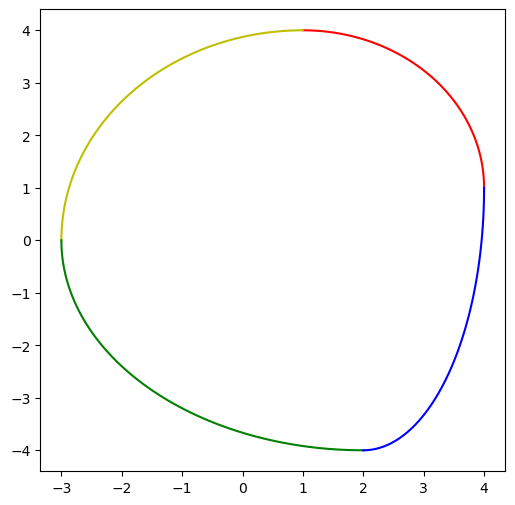

In [211]:
trajectory5 = get_ellipse_seg(testB, testA, 'clockwise', sampling_dist=sampling_dist)
# print(trajectory5)
plt.plot(trajectory5[:, 0], trajectory5[:, 1], 'r')

trajectory6 = get_ellipse_seg(testC, testB, 'clockwise', sampling_dist=sampling_dist)
plt.plot(trajectory6[:, 0], trajectory6[:, 1], 'y')

trajectory7 = get_ellipse_seg(testD, testC, 'clockwise', sampling_dist=sampling_dist)
plt.plot(trajectory7[:, 0], trajectory7[:, 1], 'g')

trajectory8 = get_ellipse_seg(testA, testD, 'clockwise', sampling_dist=sampling_dist)
plt.plot(trajectory8[:, 0], trajectory8[:, 1], 'b')

In [212]:
# def get_circular_seg(start, end, orientation=None, sampling_dist=1):
#     """Generate circular arc smoothly connecting start[1] and end[0]
    
#     Arguments:
    
#     start: an np.ndarray of 2 points on the segment before turn, 
#     in the order of the travelling direction. start[1] must be an endpoint.
    
#     end: an np.ndarray of 2 points on the segment before turn, 
#     in the order of the travelling direction. end[0] must be an endpoint.
    
#     orientation: for the unification in higher-level API. Default to None.
    
#     sampling_dist: disired sampling distance. Default to 1."""
#     if np.shape(start) != (2, 2) or np.shape(end) != (2, 2):
#         raise TypeError("start, end must be 2 by 2 matrix")
#     if sampling_dist <= 0:
#         raise ValueError("sampling distance must be positive")
#     # create linear system
#     print("start", start)
#     print("end", end)
#     v1 = start[1] - start[0]
#     v2 = end[1] - end[0]
#     cross_prod = np.cross(v1, v2)
#     A = np.zeros((2, 2))
#     # by linear algebra
#     if cross_prod > 0:
#         print("left turn")
#         A[0, 0] = -v1[1]
#         A[1, 0] = v1[0]
#         A[0, 1] = v2[1]
#         A[1, 1] = -v2[0]
#     elif cross_prod < 0:
#         print("right turn")
#         A[0, 0] = v1[1]
#         A[1, 0] = -v1[0]
#         A[0, 1] = -v2[1]
#         A[1, 1] = v2[0]
#     else:
#         raise ValueError("this is a straight line")
#     # A = np.zeros((2, 2))
#     # A[:, 0] = start[1] - start[0]
#     # A[:, 1] = end[1] - end[0]
#     print("A =", A)
#     b = end[0] - start[1]
#     print("b =", b)
#     t = scipy.linalg.solve(A, b)
#     print("t =", t)
#     radius_vec = t[0] * A[:, 0]
#     radius_from_B1 = -t[1] * A[:, 1]
#     plt.arrow(start[1, 0], start[1, 1], radius_vec[0], radius_vec[1])
#     plt.arrow(end[0, 0], end[0, 1], radius_from_B1[0], radius_from_B1[1])
#     # radius_vec = -t[1]*A[:, 1]
#     center = start[1, :] + radius_vec
#     # center = end[0] + radius_vec
#     radius_mag = np.linalg.norm(radius_vec)
#     print("radius from A2 =", radius_mag)
#     print("radius from B1 =", np.linalg.norm(radius_from_B1))
#     sample_num = int(radius_mag / sampling_dist)
#     plt.plot(start[:, 0], start[:, 1], 'r*')
#     plt.plot(end[:, 0], end[:, 1], 'g*')
#     plt.plot(center[0], center[1], 'b*')
#     angle_start = np.arctan2(-A[1, 0], -A[0, 0])
#     angle_end = np.arctan2(A[1, 1], A[0, 1])
#     theta = np.linspace(angle_start, angle_end, sample_num)
#     segment = np.zeros((sample_num, 2))
#     segment[:, 0] = center[0] + radius_mag*np.cos(theta)
#     segment[:, 1] = center[1] + radius_mag*np.sin(theta)
#     # print(segment)
#     plt.plot(segment[:, 0], segment[:, 1])
#     return segment

In [213]:
# # test get_circular_seg
# start = np.array([nodes[38], nodes[45]])
# end = np.array([nodes[46], nodes[47]])
# get_circular_seg(start, end)
# start = np.array(([-10, -10], [-10, 0]))
# end = np.array(([0, 10], [10, 20]))
# print(start)
# get_circular_seg(start, end)

In [214]:
def get_json(seg, filename: str):
    """Converts the given segment to json file
    
    Arguments:
    
    seg (2D ndarray): waypoints
    filename (str): json file name"""
    if filename.split('.')[-1] != "json":
        raise ValueError("file extension must be json!")
    df = pd.DataFrame(seg)
    df.columns = ["X", "Y"]
    json_data = df.to_dict(orient='list')
    with open(filename, 'w') as json_file:
        json.dump(json_data, json_file)

In [215]:
# sampling_dist = 10 # set the sampling distance 
def get_seg(start: int, end: int, type: str, orientation=None, sampling_dist=1):
    if not isinstance(start, int) or not isinstance(end, int):
        raise TypeError("start and end must be integer indices")
    if start <= 0 or end <= 0:
        raise ValueError("start and end must be positive integers")
    if type not in ['straight', 'turn']:
        raise ValueError("check type argument")
    if type == 'turn' and orientation==None:
        raise ValueError("an orientation is required for curve")
    if type == 'straight':
        seg = get_straight_seg(nodes[start], nodes[end], sampling_dist)/10
        df = pd.DataFrame(seg)
        df.columns = ['X', 'Y']
        filename = str(start) + "_to_" + str(end) + ".json"
        # df.to_csv(filename, index=False, index_label=False)
        get_json(seg, filename)
        plt.plot(seg[:, 0], seg[:, 1])
    elif type == 'turn':
        seg = get_ellipse_seg(nodes[start], nodes[end], orientation, sampling_dist)/10
        df = pd.DataFrame(seg)
        df.columns = ['x', 'y']
        filename = str(start) + "_to_" + str(end) + ".json"
        # df.to_csv(filename, index=False, index_label=False)
        get_json(seg, filename)
        plt.plot(seg[:, 0], seg[:, 1])

In [216]:
def get_segs(info, sampling_dist: int=1):
    """
    Output: plt graph and .csv waypoints of each segment

    Args:
        info (list of tuples): a list of tuples containing parameters for each segment
        (start_index, end_index, type of line, orientation)
        sampling_dist (int): defaults to 1.
    """
    for line in info:
        start, end, type, orientation = line
        get_seg(start, end, type, orientation, sampling_dist)
        

In [217]:
def array_to_csv(array: np.ndarray, start: int, end: int):
    """Converts np.ndarray to .csv file

    Args:
        array (np.ndarray): input array
        start (int): segment start node index
        end (int): segment end node index
    """
    
    if not isinstance(start, int) or not isinstance(end, int):
        raise TypeError("start and end must be integers")
    elif start <= 0 or end <= 0:
        raise ValueError("start and end must be positive")
    else:
        df = pd.DataFrame(array)
        filename = str(start) + "_to_" + str(end) + ".csv"
        df.to_csv(filename, index=False, index_label=False)

curve in the first quadrant
curve in the first quadrant
curve in the fourth quadrant
curve in the third quadrant
curve in the second quadrant
curve in the first quadrant
curve in the fourth quadrant
curve in the fourth quadrant
curve in the fourth quadrant
curve in the third quadrant
curve in the second quadrant
curve in the first quadrant
curve in the fourth quadrant
curve in the third quadrant
curve in the third quadrant
curve in the third quadrant
curve in the third quadrant
curve in the second quadrant
curve in the second quadrant
curve in the second quadrant
0.7434913276589565
34.78817521366628
34
[[  5.345      -14.03      ]
 [  5.34632135 -13.92459233]
 [  5.35028456 -13.8192509 ]
 [  5.35688714 -13.71404193]
 [  5.36612494 -13.60903152]
 [  5.37799216 -13.50428567]
 [  5.39248133 -13.39987022]
 [  5.40958336 -13.29585078]
 [  5.4292875  -13.19229273]
 [  5.45158135 -13.08926115]
 [  5.47645092 -12.98682079]
 [  5.50388056 -12.88503603]
 [  5.53385305 -12.78397083]
 [  5.5663495

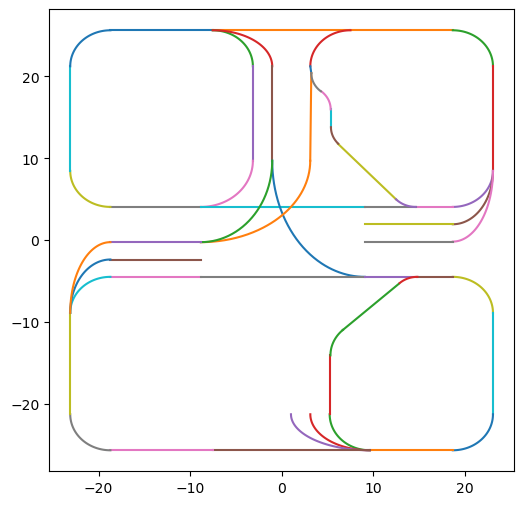

In [221]:
sampling_dist = 1
info = [
    (1, 2, 'straight', None), (2, 3, 'straight', None), (2, 6, 'turn', 'clockwise'), 
    (2, 7, 'turn', 'clockwise'), (6, 11, 'straight', None), (7, 12, 'straight', None), 
    (11, 44, 'turn', 'clockwise'), (44, 33, 'straight', None), (33, 14, 'turn', 'clockwise'),
    (14, 5, 'straight', None), (5, 1, 'turn', 'clockwise'), (3, 4, 'straight', None), 
    (4, 9, 'turn', 'clockwise'), (9, 18, 'straight', None), (18, 17, 'turn', 'clockwise'), 
    (18, 20, 'turn', 'clockwise'), (18, 22, 'turn', 'clockwise'), (22, 21, 'straight', None), 
    (20, 19, 'straight', None), (15, 44, 'straight', None), (12, 29, 'turn', 'anticlockwise'), 
    (24, 13, 'turn', 'anticlockwise'), (24, 12, 'turn', 'anticlockwise'), (8, 3, 'turn', 'clockwise'),
    (23, 24, 'straight', None), (25, 26, 'straight', None), (27, 28, 'straight', None), 
    (28, 29, 'straight', None), (31, 32, 'turn', 'clockwise'), (32, 39, 'straight', None), 
    (39, 43, 'turn', 'clockwise'), (43, 42, 'straight', None), (42, 38, 'turn', 'clockwise'),
    (42, 37, 'turn', 'clockwise'), (42, 36, 'turn', 'clockwise'), (42, 41, 'straight', None), 
    (41, 40, 'straight', None), (40, 35, 'turn', 'clockwise'), (35, 34, 'straight', None), 
    (34, 27, 'turn', 'clockwise'), (34, 25, 'turn', 'clockwise'), (34, 23, 'turn', 'clockwise'), 
    (46, 47, 'straight', None), (38, 45, 'straight', None), (29, 30, 'straight', None),
    (30, 31, 'straight', None), (17, 16, 'straight', None), (16, 15, 'straight', None), 
    (48, 49, 'straight', None), (50, 51, 'straight', None), (10, 8, 'straight', None),
    (13, 10, 'straight', None)
]

plt.rcParams['figure.figsize'] = [6, 6] # set plot as a square
# plt.set_box_aspect(1)
get_segs(info, sampling_dist=sampling_dist)
# draw circular arcs
# circle F
theta = np.arctan((nodes[47][1]-nodes[46][1]) / (nodes[47][0]-nodes[46][0]))
print(theta)
arclength = r4 * (np.pi/2 - theta)
print(arclength)
sample_num = int(arclength / sampling_dist)
print(sample_num)
t = np.linspace(0, np.pi/2 - theta, sample_num)
arc_trajectory = np.zeros((sample_num, 2))
arc_trajectory[:, 0] = -r4*np.cos(t) + ptF[0]
arc_trajectory[:, 1] = r4*np.sin(t) + ptF[1]
arc_trajectory = arc_trajectory / 10
print(arc_trajectory)

# df = pd.DataFrame(arc_trajectory)
# df.columns = ['x', 'y']
filename = str(45) + "_to_" + str(46) + ".json"
# df.to_csv(filename, index=False, index_label=False)
get_json(arc_trajectory, filename)

plt.plot(arc_trajectory[:, 0], arc_trajectory[:, 1])

# circle E
# theta = np.arctan((nodes[47][1]-nodes[46][1]) / (nodes[47][0]-nodes[46][0]))
# print(theta)
arclength = r4 * theta
print(arclength)
sample_num = int(arclength / sampling_dist)
print(sample_num)
t = np.linspace(np.pi/2 - theta, np.pi/2, sample_num)
arc_trajectory = np.zeros((sample_num, 2))
arc_trajectory[:, 0] = -r3*np.cos(t) + ptE[0]
arc_trajectory[:, 1] = r3*np.sin(t) + ptE[1]
arc_trajectory = arc_trajectory / 10
print(arc_trajectory)

# df = pd.DataFrame(arc_trajectory)
# df.columns = ['x', 'y']
filename = str(47) + "_to_" + str(30) + ".json"
# df.to_csv(filename, index=False, index_label=False)
get_json(arc_trajectory, filename)

plt.plot(arc_trajectory[:, 0], arc_trajectory[:, 1])

# circle G
theta = np.pi - np.arctan2(nodes[49][1]-nodes[48][1], nodes[49][0]-nodes[48][0])
print(theta)
arclength = rG * theta
sample_num = int(arclength/sampling_dist)
t = np.linspace(-np.pi/2, -np.pi/2 - theta, sample_num)
arc_trajectory = np.zeros((sample_num, 2))
arc_trajectory[:, 0] = ptG[0] + np.cos(t)*rG
arc_trajectory[:, 1] = ptG[1] + np.sin(t)*rG
arc_trajectory = arc_trajectory / 10
plt.plot(arc_trajectory[:, 0], arc_trajectory[:, 1])
# plt.figure().set_figwidth(640)
filename = str(16) + "_to_" + str(48) + ".json"
get_json(arc_trajectory, filename)

# circle H
theta = np.pi - np.arctan2(nodes[49][1]-nodes[48][1], nodes[49][0]-nodes[48][0])
theta = np.pi/2 - theta
print(theta)
arclength = rH * theta
sample_num = int(arclength/sampling_dist)
t = np.linspace(-np.pi+theta, -np.pi, sample_num)
arc_trajectory = np.zeros((sample_num, 2))
arc_trajectory[:, 0] = ptH[0] + np.cos(t)*rG
arc_trajectory[:, 1] = ptH[1] + np.sin(t)*rG
filename = str(49) + "_to_" + str(50)+".json"
get_json(arc_trajectory, filename)
arc_trajectory = arc_trajectory / 10
plt.plot(arc_trajectory[:, 0], arc_trajectory[:, 1])

# circle I
theta = np.arctan2(nodes[52][1]-ptI[1], nodes[52][0]-ptI[0])
# theta = np.pi/2 - theta
print(theta)
arclength = rI * theta
sample_num = int(arclength/sampling_dist)
t = np.linspace(0, theta, sample_num)
arc_trajectory = np.zeros((sample_num, 2))
arc_trajectory[:, 0] = ptI[0] + np.cos(t)*rI
arc_trajectory[:, 1] = ptI[1] + np.sin(t)*rI
filename = str(51) + "_to_" + str(52)+".json"
get_json(arc_trajectory, filename)
arc_trajectory = arc_trajectory / 10
plt.plot(arc_trajectory[:, 0], arc_trajectory[:, 1])

# circle J
theta = np.arctan2(nodes[52][1]-ptI[1], nodes[52][0]-ptI[0])
# theta = np.pi/2 - theta
print(theta)
arclength = rJ * theta
sample_num = int(arclength/sampling_dist)
t = np.linspace(-np.pi+theta, -np.pi, sample_num)
arc_trajectory = np.zeros((sample_num, 2))
arc_trajectory[:, 0] = ptJ[0] + np.cos(t)*rJ
arc_trajectory[:, 1] = ptJ[1] + np.sin(t)*rJ
arc_trajectory = arc_trajectory / 10

filename = str(52) + "_to_" + str(10)+".json"
get_json(arc_trajectory, filename)
plt.plot(arc_trajectory[:, 0], arc_trajectory[:, 1])
plt.show()

curve in the first quadrant
curve in the first quadrant
curve in the fourth quadrant
curve in the third quadrant


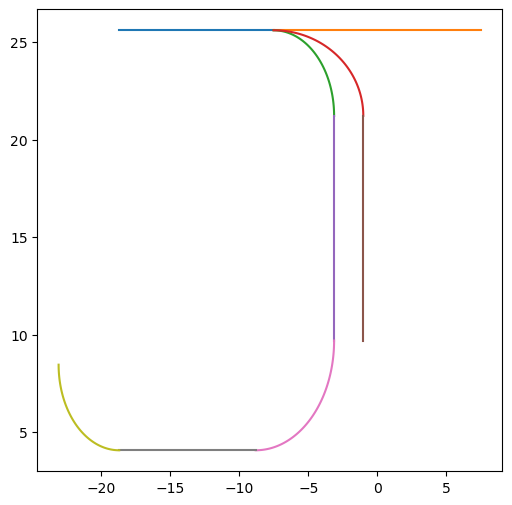

In [219]:
sampling_dist = 1 # set the sampling distance 
get_seg(1, 2, 'straight', None, sampling_dist)
get_seg(2, 3, 'straight', None, sampling_dist)
get_seg(2, 6, 'turn', 'clockwise', sampling_dist)
get_seg(2, 7, 'turn', 'clockwise', sampling_dist)
get_seg(6, 11, 'straight', None, sampling_dist)
get_seg(7, 12, 'straight', None, sampling_dist)
get_seg(11, 44, 'turn', 'clockwise', sampling_dist)
get_seg(44, 33, 'straight', None, sampling_dist)
get_seg(33, 14, 'turn', 'clockwise', sampling_dist)
# plt.arrow(5, 25, 2, 10, color='red', head_width=0.5, head_length=0.5)